In [175]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

In [176]:
data = np.loadtxt("C6_yaw.txt")

In [177]:
print(data)

[-66.642 -66.64  -66.637 ..., -33.694 -33.675 -33.649]


In [178]:
time = np.ones_like(data)
print(time)

[ 1.  1.  1. ...,  1.  1.  1.]


In [179]:
print(np.shape(time))

(137369,)


In [197]:
time = np.ones_like(data)
k = 0
j = 1/41
while k < 137369:
    time[k] = time[k]*k*j/60/20
    w = k
    k+=1
print(w)

137368


In [198]:
print(time)

[  0.00000000e+00   2.03252033e-05   4.06504065e-05 ...,   2.79199187e+00
   2.79201220e+00   2.79203252e+00]


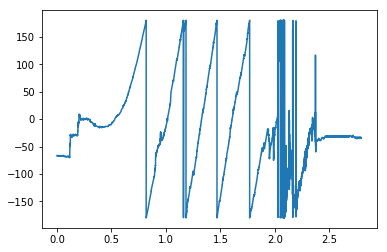

In [199]:
plt.plot(time,data)

In [200]:
i=0
n=0
wait = 0
waiting_time = 0
data_continuous = np.ones_like(data)
while n < 137369:
    if wait == 1:
        waiting_time+=1
    if waiting_time == 10000:
        wait = 0
    if n == 10600:
        wait = 1
        waiting_time = 0 
    if data[n-1] > 0 and data[n] < 0 and wait == 0:
        i+=1
        wait = 1
        waiting_time = 0
    data_continuous[n] = data[n]+i*360
    n+=1
print(data_continuous)

[  -66.642   -66.64    -66.637 ...,  2126.306  2126.325  2126.351]


In [201]:
data_continuous[101607] = 1765
data_continuous[107893] = 1765

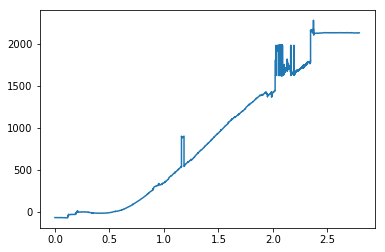

In [202]:
plt.plot(time, data_continuous)

In [203]:
print(data_continuous)

[  -66.642   -66.64    -66.637 ...,  2126.306  2126.325  2126.351]


In [204]:
print(data[1])

-66.64


In [205]:
import scipy.optimize

In [206]:
i = 0
while i < 137369:
    if np.isnan(data_continuous[i]) == True:
        print(i)
    i+=1
print(i)

137369


In [207]:
#np.isnan(data_continuous).any()
#np.isnan(time).any()

#np.isinf(data_continuous).any()
np.isinf(time).any()

False

In [208]:
def drift(x, a,b, c, d,e):
    return a*np.exp(d*x)+e*x**b+c

In [209]:
r = scipy.optimize.curve_fit(drift, time, data_continuous)
print(r)

C:\Users\mjordan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in power
  from ipykernel import kernelapp as app
C:\Users\mjordan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app


(array([  2.52052507e+03,   5.22119169e-01,  -2.88689286e+03,
        -2.44432587e+00,   3.05077007e+03]), array([[  6.78187883e+01,  -1.21069909e-02,  -1.01713185e+02,
         -1.15137521e-02,   9.69264067e+01],
       [ -1.21069909e-02,   2.47278964e-06,   1.88500073e-02,
          3.96307622e-06,  -1.85254882e-02],
       [ -1.01713185e+02,   1.88500073e-02,   1.56185513e+02,
          1.76598977e-02,  -1.49396257e+02],
       [ -1.15137521e-02,   3.96307622e-06,   1.76598977e-02,
          2.24918987e-05,  -2.16960244e-02],
       [  9.69264067e+01,  -1.85254882e-02,  -1.49396257e+02,
         -2.16960244e-02,   1.44191689e+02]]))


In [210]:
(a,b, c, d,e) = r[0]
print(a,b,c, d,e)

2520.52507208 0.522119168913 -2886.89286255 -2.44432586756 3050.77006672


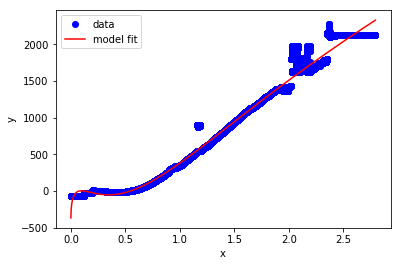

In [211]:
plt.plot(time, data_continuous, linestyle='' , marker='o', color='blue', label='data')
plt.plot(time, drift(time, a, b, c, d,e), linestyle='-', color='red' , label='model fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(numpoints=1, loc='upper left')


In [212]:
data_no_drift = data_continuous - drift(time,a,b,c,d,e)

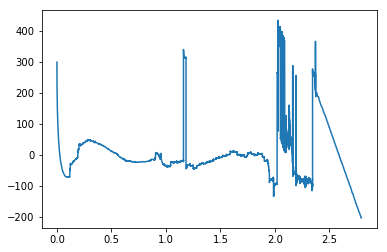

In [213]:
plt.plot(time,data_no_drift)